In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, r2_score,mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [76]:
df=pd.read_csv(r"C:\Users\vivek\OneDrive\Desktop\Machine Learning(IA)\ML_Assignments\Datasets\melb_data.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [78]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


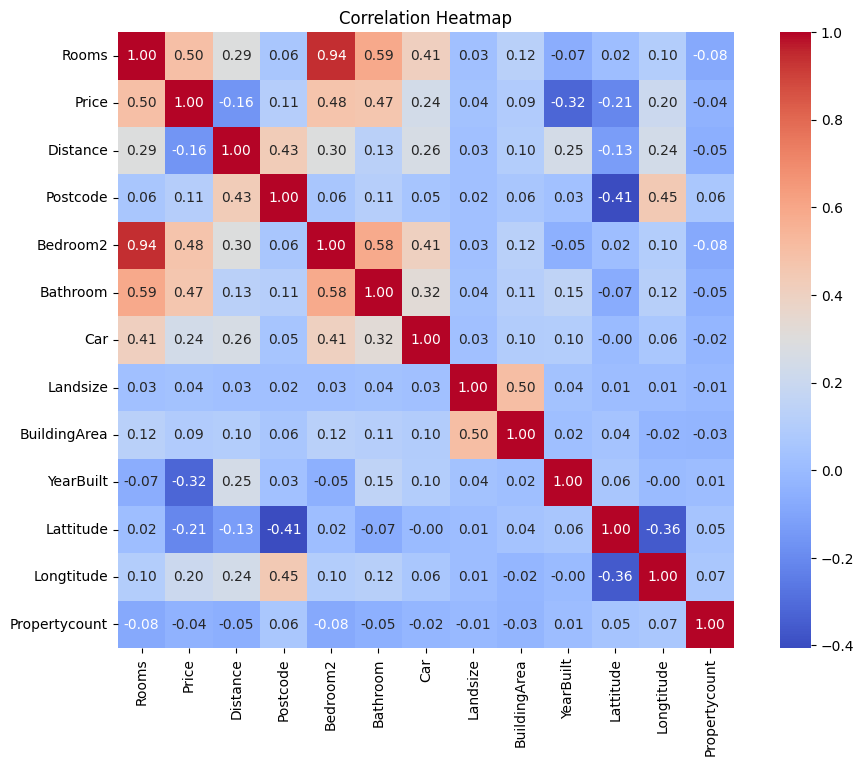

In [79]:
import seaborn as sns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()


In [80]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [81]:
df["Suburb"].value_counts()

Suburb
Reservoir         359
Richmond          260
Bentleigh East    249
Preston           239
Brunswick         222
                 ... 
Sandhurst           1
Bullengarook        1
Croydon South       1
Montrose            1
Monbulk             1
Name: count, Length: 314, dtype: int64

In [82]:
df["Type"].value_counts()

Type
h    9449
u    3017
t    1114
Name: count, dtype: int64

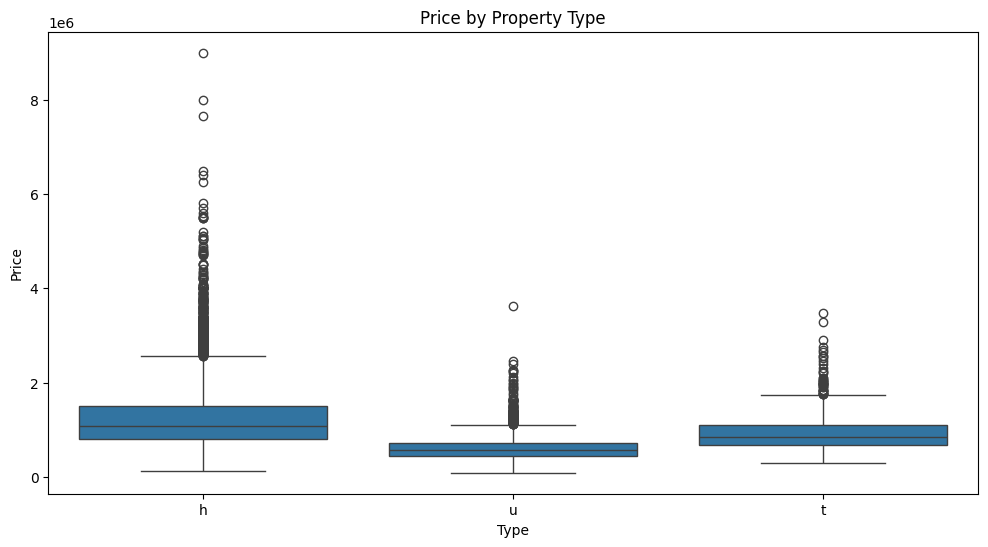

In [59]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Price', data=df)
plt.title('Price by Property Type')
plt.show()

In [ ]:
def one_hot_encode(df, column):
    encoder = OneHotEncoder(sparse_output=False)  
    encoded_array = encoder.fit_transform(df[[column]])
    encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out([column]))
    df_encoded = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
    df_encoded.drop(column, axis=1, inplace=True)
    return df_encoded

df = one_hot_encode(df, column='Type')
df.head()

,Suburb,Address,Rooms,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Type_h,Type_t,Type_u
0,Abbotsford,85 Turner St,2,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,...,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,1.0,0.0,0.0
1,Abbotsford,25 Bloomburg St,2,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,...,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,1.0,0.0,0.0
2,Abbotsford,5 Charles St,3,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,...,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,1.0,0.0,0.0
3,Abbotsford,40 Federation La,3,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,...,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,1.0,0.0,0.0
4,Abbotsford,55a Park St,4,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,...,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,1.0,0.0,0.0


In [92]:
dropped_columns = ['Suburb','Address','Method','SellerG','Date', 'Distance','Regionname','Propertycount','Landsize','BuildingArea','YearBuilt','CouncilArea','Postcode','Lattitude','Longtitude','Postcode']
df.drop(columns=dropped_columns, axis=1, inplace=True)
df.head()

,Rooms,Price,Bedroom2,Bathroom,Car,Type_h,Type_t,Type_u
0,2,1480000.0,2.0,1.0,1.0,1.0,0.0,0.0
1,2,1035000.0,2.0,1.0,0.0,1.0,0.0,0.0
2,3,1465000.0,3.0,2.0,0.0,1.0,0.0,0.0
3,3,850000.0,3.0,2.0,1.0,1.0,0.0,0.0
4,4,1600000.0,3.0,1.0,2.0,1.0,0.0,0.0


In [95]:
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13518 entries, 0 to 13579
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rooms     13518 non-null  int64  
 1   Price     13518 non-null  float64
 2   Bedroom2  13518 non-null  float64
 3   Bathroom  13518 non-null  float64
 4   Car       13518 non-null  float64
 5   Type_h    13518 non-null  float64
 6   Type_t    13518 non-null  float64
 7   Type_u    13518 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 950.5 KB


In [96]:
df.isnull().sum()

Rooms       0
Price       0
Bedroom2    0
Bathroom    0
Car         0
Type_h      0
Type_t      0
Type_u      0
dtype: int64

In [99]:
X=df.drop(["Price"],axis=1)
y=df["Price"]


In [100]:
X

,Rooms,Bedroom2,Bathroom,Car,Type_h,Type_t,Type_u
0,2,2.0,1.0,1.0,1.0,0.0,0.0
1,2,2.0,1.0,0.0,1.0,0.0,0.0
2,3,3.0,2.0,0.0,1.0,0.0,0.0
3,3,3.0,2.0,1.0,1.0,0.0,0.0
4,4,3.0,1.0,2.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
13575,4,4.0,2.0,2.0,1.0,0.0,0.0
13576,3,3.0,2.0,2.0,1.0,0.0,0.0
13577,3,3.0,2.0,4.0,1.0,0.0,0.0
13578,4,4.0,1.0,5.0,1.0,0.0,0.0


In [101]:
y

0        1480000.0
1        1035000.0
2        1465000.0
3         850000.0
4        1600000.0
           ...    
13575    1245000.0
13576    1031000.0
13577    1170000.0
13578    2500000.0
13579    1285000.0
Name: Price, Length: 13518, dtype: float64

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [123]:
# Linear regression
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()
linear_regression.fit(X_train_scaled,y_train)
y_pred1 = linear_regression.predict(X_test_scaled)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

print("Mean Squared Error:", mse)
print("R² Score:", r2)



Mean Squared Error: 275172707121.10254
R² Score: 0.33077454818980345


In [125]:
# logistic regression
from sklearn.linear_model import LogisticRegression
logistic_regression=LinearRegression()
logistic_regression.fit(X_train_scaled,y_train)
y_pred2 = logistic_regression.predict(X_test_scaled)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 275172707121.10254
R² Score: 0.33077454818980345


In [132]:
# SVM
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(X_train_scaled,y_train)
y_pred3 = logistic_regression.predict(X_test_scaled)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 275172707121.10254
R² Score: 0.33077454818980345


In [133]:
# Decision tree regression
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred4 = dt_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 271007201281.62933
R² Score: 0.3409051405606981


In [134]:
# Adaboost
from sklearn.ensemble import AdaBoostRegressor
base_tree = DecisionTreeRegressor(max_depth=4)

# AdaBoost Regressor
ada_model = AdaBoostRegressor(
    estimator=base_tree,
    n_estimators=100,         
    learning_rate=0.1,        
    random_state=42
)

# Fit the model
ada_model.fit(X_train, y_train)
y_pred5= ada_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred5)
r2 = r2_score(y_test, y_pred5)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 288421544840.50433
R² Score: 0.2985531135079672


In [129]:
# XGBoost
from xgboost import XGBRegressor
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

xgb_model.fit(X_train, y_train)


y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost - Mean Squared Error:", mse_xgb)
print("XGBoost - R² Score:", r2_xgb)




XGBoost - Mean Squared Error: 269462563572.44604
XGBoost - R² Score: 0.3446617299391509


In [135]:
from catboost import CatBoostRegressor, Pool
cat_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='RMSE',
    random_seed=42,
    verbose=100 
)

cat_model.fit(X_train, y_train)

y_pred_cat = cat_model.predict(X_test)

mse_cat = mean_squared_error(y_test, y_pred_cat)
r2_cat = r2_score(y_test, y_pred_cat)

print("CatBoost - Mean Squared Error:", mse_cat)
print("CatBoost - R² Score:", r2_cat)



0:	learn: 618985.1956011	total: 2.59ms	remaining: 2.59s
100:	learn: 504687.8544324	total: 269ms	remaining: 2.39s
200:	learn: 500603.7529647	total: 466ms	remaining: 1.85s
300:	learn: 499111.5611887	total: 640ms	remaining: 1.49s
400:	learn: 498153.1174135	total: 813ms	remaining: 1.21s
500:	learn: 497426.1885903	total: 988ms	remaining: 984ms
600:	learn: 496951.9512977	total: 1.17s	remaining: 777ms
700:	learn: 496511.8484194	total: 1.38s	remaining: 589ms
800:	learn: 496262.6391352	total: 1.56s	remaining: 387ms
900:	learn: 496036.3215941	total: 1.75s	remaining: 192ms
999:	learn: 495830.3835520	total: 1.94s	remaining: 0us
CatBoost - Mean Squared Error: 273960427750.90976
CatBoost - R² Score: 0.3337228355316887
